<a href="https://colab.research.google.com/github/rikcav/pokemanos/blob/henrique/Pokemanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importação dos dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pokemon = pd.read_csv('./data/pokemon.csv')
colors = pd.read_csv('./data/colors.csv')[['name', 'hex1', 'hex2', 'hex3']]
animal_types = pd.read_csv('./data/animal_types.csv')

#### Tratamento de nulos

In [ ]:
pokemon['type2'].fillna(pokemon['type1'], inplace=True)
pokemon['height_m'].fillna(pokemon['height_m'].median(), inplace=True)
pokemon['percentage_male'].fillna(pokemon['percentage_male'].median(), inplace=True)
pokemon['weight_kg'].fillna(pokemon['weight_kg'].median(), inplace=True)

#### Mescla de tabelas

In [ ]:
merged_df = pd.merge(pokemon, colors, left_on='name', right_on='name', how='left')
merged_df = pd.merge(merged_df,animal_types, left_on='name', right_on='pokemon', how='left')
pokemon = merged_df.copy()

In [ ]:
df = pokemon[['type1', 'is_legendary']]
df[df['type1'] == 'psychic'].value_counts()

type1    is_legendary
psychic  0               36
         1               17
dtype: int64

In [ ]:
print(pokemon.isna().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 205, 205]


In [ ]:
pokemon = pokemon.dropna()

In [ ]:
pokemon.shape

(596, 47)

#### Tranformação dos hex codes em cores rgb

In [ ]:
# Função que transforma HEX em RGB
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    r = int(hex_code[0:2], 16)
    g = int(hex_code[2:4], 16)
    b = int(hex_code[4:6], 16)
    return r, g, b

In [ ]:
# Criação de novas colunas para as cores RGB
pokemon['rgb1'] = pokemon['hex1'].apply(hex_to_rgb)
pokemon['rgb2'] = pokemon['hex2'].apply(hex_to_rgb)
pokemon['rgb3'] = pokemon['hex3'].apply(hex_to_rgb)

In [ ]:
# Drop das colunas de HEX
pokemon = pokemon.drop(['hex1', 'hex2', 'hex3'], axis=1)

In [ ]:
# Criação de novas colunas(Red, Green, Blue) para cada cor
pokemon['red1'] = pokemon['rgb1'].apply(lambda x: x[0])
pokemon['green1'] = pokemon['rgb1'].apply(lambda x: x[1])
pokemon['blue1'] = pokemon['rgb1'].apply(lambda x: x[2])

pokemon['red2'] = pokemon['rgb2'].apply(lambda x: x[0])
pokemon['green2'] = pokemon['rgb2'].apply(lambda x: x[1])
pokemon['blue2'] = pokemon['rgb2'].apply(lambda x: x[2])

pokemon['red3'] = pokemon['rgb3'].apply(lambda x: x[0])
pokemon['green3'] = pokemon['rgb3'].apply(lambda x: x[1])
pokemon['blue3'] = pokemon['rgb3'].apply(lambda x: x[2])

In [ ]:
# Drop das colunas antigas de RGB
pokemon = pokemon.drop(['rgb1','rgb2','rgb3'], axis=1)

In [ ]:
# Tratamento da coluna capture_rate
pokemon['capture_rate'] = pd.to_numeric(pokemon['capture_rate'], errors='coerce')

#### Coisas úteis para visualização de dados

In [ ]:
# import matplotlib.pyplot as plt

# # pokemon[(pokemon['generation'] == 6)]['type1'].value_counts().plot(kind='pie')
# pokemon.groupby('type1')['sp_defense'].mean().plot(kind='bar')

In [ ]:
# pokemon.groupby('type2')['sp_defense'].mean().plot(kind='bar')

#### Tratamento dos tipos de pokémon

In [ ]:
types = ['water', 'grass', 'fire', 'electric', 'psychic', 'ground', 'poison', 'rock', 'dark', 'fairy', 'dragon', 'ice']
pokemon['unique_type'] = pokemon['type1']
pokemon = pokemon[pokemon['unique_type'].isin(types)]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
pokemon['unique_type'].value_counts()

water       109
grass        77
fire         45
electric     31
psychic      26
ground       25
poison       24
rock         20
dark         19
fairy        13
dragon       13
ice          10
Name: unique_type, dtype: int64

In [ ]:
le = LabelEncoder().fit(pokemon['unique_type'])

In [ ]:
le.classes_

array(['dark', 'dragon', 'electric', 'fairy', 'fire', 'grass', 'ground',
       'ice', 'poison', 'psychic', 'rock', 'water'], dtype=object)

In [ ]:
unique_type_tranformed = le.transform(pokemon['unique_type'])

In [ ]:
# Drop das antigas colunas de tipos 1 e 2
pokemon.drop(['type1', 'type2'], axis=1, inplace=True)

In [ ]:
pokemon['unique_type'] = unique_type_tranformed

In [ ]:
# pokemon.drop(['specific_type'], axis=1, inplace=True)

#### One-hot encode

In [ ]:
columns_to_hot_encode = ['super_type', 'specific_type']
for c in columns_to_hot_encode:
  pokemon = pd.get_dummies(pokemon, columns=[c], prefix=c)

In [ ]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,pokemon,red1,green1,blue1,red2,green2,blue2,red3,green3,blue3,unique_type,super_type_Amphibian Pokémon,super_type_Arthropod Pokémon,super_type_Avian Pokémon,super_type_Clitellata Pokémon,super_type_Cnidaria Pokémon,super_type_Echinoderm Pokémon,super_type_Fish Pokémon,super_type_Mammalian Pokémon,super_type_Mollusc Pokémon,super_type_Plant Pokémon,super_type_Reptilian Pokémon,specific_type_Anglerfish-based,specific_type_Anteater-based,specific_type_Antlion-based,specific_type_Banana tree-based,specific_type_Bat-based,specific_type_Bear-based,specific_type_Bird-based,specific_type_Bivalve-based,specific_type_Bluebird-based,specific_type_Bovine-based,specific_type_Bud-based,specific_type_Butterflyfish-based,specific_type_Cactus-based,specific_type_Camel-based,specific_type_Canine-based,specific_type_Caprid-based,specific_type_Carp-based,specific_type_Catfish-based,specific_type_Cephalopod-based,specific_type_Cherry-based,specific_type_Chestnut-based,specific_type_Cocoon-based,specific_type_Coelacanth-based,specific_type_Coniferous tree-based,specific_type_Coral-based,specific_type_Cotton-based,specific_type_Crinoid-based,specific_type_Crocodile-based,specific_type_Crow-based,specific_type_Crustacean-based,specific_type_Dandelion-based,specific_type_Deer-based,specific_type_Dinocaridid-based,specific_type_Dinosaur-based,specific_type_Discus-based,specific_type_Duck-based,specific_type_Durian-based,specific_type_Earthworm-based,specific_type_Eel-based,specific_type_Elephant-based,specific_type_Equidae-based,specific_type_Falcon-based,specific_type_Feline-based,specific_type_Flamingo-based,specific_type_Flatfish-based,specific_type_Flower-based,specific_type_Fly agaric-based,specific_type_Fox-based,specific_type_Frog- and toad-based,specific_type_Fungus-based,specific_type_Galliform-based,specific_type_Gastropod-based,specific_type_Geastrales-based,specific_type_Geranium-based,specific_type_Glyptodont-based,specific_type_Hedgehog-based,specific_type_Hippopotamus-based,specific_type_Honeycreeper-based,specific_type_Horseshoe crab-based,specific_type_Hyena-based,specific_type_Jellyfish-based,specific_type_Kangaroo-based,specific_type_Lamprey-based,specific_type_Leaf-based,specific_type_Lepidopteran-based,specific_type_Lilium-based,specific_type_Lizard-based,specific_type_Loach-based,specific_type_Mangosteen-based,specific_type_Manta ray-based,specific_type_Mantis-based,specific_type_Marlin-based,specific_type_Mole-based,specific_type_Oak tree-based,specific_type_Orca-based,specific_type_Owl-based,specific_type_Palm tree-based,specific_type_Pangolin-based,specific_type_Pelican-based,specific_type_Penguin-based,specific_type_Percoid-based,specific_type_Pig-based,specific_type_Pinniped-based,specific_type_Piranha-based,specific_type_Pitcher plant-based,specific_type_Plectognathi-based,specific_type_Plesiosaur-based,specific_type_Primate-based,specific_type_Pterosaur-based,specific_type_Quetzal-based,specific_type_Rabbit-based,specific_type_Rafflesia-based,specific_type_Rhinoceros-based,specific_type_Robin-based,specific_type_Rodent-based,specific_type_Rose-based,specific_type_Salamander-based,specific_type_Sardine-based,specific_type_Scorpion-based,specific_type_Sea cucumber-based,specific_type_Seagull-based,specific_type_Shark-based,specific_type_Skunk-based,specific_type_Snake-based,specific_type_Spider-based,specific_type_Starfish-based,specific_type_Sunflower-based,specific_type_Swan-based,specific_type_Syngnathidae-based,specific_type_Tapir-based,spec

#### Tratamento das colunas

In [ ]:
pokemon.drop(['height_m', 'name', 'japanese_name', 'pokedex_number', 'percentage_male',
              'classfication', 'base_egg_steps', 'base_happiness', 'abilities',
              'experience_growth', 'defense', 'base_total', 'speed'], axis=1, inplace=True)

In [ ]:
against_columns = pokemon.filter(regex='^against').columns

In [ ]:
pokemon = pokemon.drop(columns=against_columns)

In [ ]:
for column in pokemon.columns:
    pokemon[column] = pd.to_numeric(pokemon[column], errors='coerce')

In [ ]:
pokemon['capture_rate'].fillna(pokemon['capture_rate'].median(), inplace=True)

In [ ]:
not 0 in pokemon.isna().sum().tolist()

False

In [ ]:
pokemon.columns[pokemon.isna().any()]

Index(['pokemon'], dtype='object')

In [ ]:
pokemon.drop(columns='pokemon', inplace=True)

#### Tentativa de clusterização por cores

In [ ]:
# colors = {
#     "black": [0, 0, 0],
#     "white": [255, 255, 255],
#     "grey": [184, 184, 208],
#     "red": [255, 0, 0],
#     "blue": [104, 144, 240],
#     "green": [94, 200, 80],
#     "yellow": [255, 255, 0],
#     "orange": [255, 125, 0],
#     "pink": [238, 153, 172],
#     "purple": [187, 151, 252]
# }
# lista_cores = []
# lista_cores2 = []
# lista_cores3 = []

# red = pokemon['red1'].to_list()
# green = pokemon['green1'].to_list()
# blue = pokemon['blue1'].to_list()

# red2 = pokemon['red2'].to_list()
# green2 = pokemon['green2'].to_list()
# blue2 = pokemon['blue2'].to_list()

# red3 = pokemon['red3'].to_list()
# green3 = pokemon['green3'].to_list()
# blue3 = pokemon['blue3'].to_list()


# for c in range(0, len(red)):
#   lista_temp = []
#   lista_temp.append(red[c])
#   lista_temp.append(green[c])
#   lista_temp.append(blue[c])
#   lista_cores.append(lista_temp)

#   lista_temp2 = []

#   lista_temp2.append(red2[c])
#   lista_temp2.append(green2[c])
#   lista_temp2.append(blue2[c])
#   lista_cores2.append(lista_temp2)

#   lista_temp3 = []

#   lista_temp3.append(red3[c])
#   lista_temp3.append(green3[c])
#   lista_temp3.append(blue3[c])
#   lista_cores3.append(lista_temp3)


# closest_colors = []
# closest_colors2 = []
# closest_colors3 = []
# def euclidean_distance(color1, color2):
#     return np.linalg.norm(np.array(color1) - np.array(color2))


# for x in lista_cores:
#     min_distance = float('inf')
#     closest_color = None
#     for color_name, color_values in colors.items():
#         distance = euclidean_distance(x, color_values)
#         if distance < min_distance:
#             min_distance = distance
#             closest_color = color_name
#     closest_colors.append(closest_color)


# for x in lista_cores2:
#     min_distance = float('inf')
#     closest_color2 = None
#     for color_name, color_values in colors.items():
#         distance = euclidean_distance(x, color_values)
#         if distance < min_distance:
#             min_distance = distance
#             closest_color2 = color_name
#     closest_colors2.append(closest_color2)


# for x in lista_cores2:
#     min_distance = float('inf')
#     closest_color3 = None
#     for color_name, color_values in colors.items():
#         distance = euclidean_distance(x, color_values)
#         if distance < min_distance:
#             min_distance = distance
#             closest_color3 = color_name
#     closest_colors3.append(closest_color3)

# pokemon["primary_color"] = closest_colors
# pokemon["secondary_color"] = closest_colors2
# pokemon["tertiary_color"] = closest_colors3

In [ ]:
# import sklearn.cluster as cluster

In [ ]:
# kmeans = cluster.KMeans(n_clusters = 10, init="k-means++")
# kmeans = kmeans.fit(pokemon[['red1', 'green1', 'blue1']])
# kmeans.cluster_centers_
# pokemon['primary_color'] = kmeans.labels_
# pokemon

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# pokemon['primary_color']

# le = LabelEncoder().fit(pokemon['primary_color'])

# le.classes_

# unique_type_tranformed = le.transform(pokemon['primary_color'])
# pokemon['primary_color'] = unique_type_tranformed


# pokemon['secondary_color']

# le = LabelEncoder().fit(pokemon['secondary_color'])

# le.classes_

# unique_type_tranformed = le.transform(pokemon['secondary_color'])
# pokemon['secondary_color'] = unique_type_tranformed


# pokemon['tertiary_color']

# le = LabelEncoder().fit(pokemon['tertiary_color'])

# le.classes_

# unique_type_tranformed = le.transform(pokemon['tertiary_color'])
# pokemon['tertiary_color'] = unique_type_tranformed

#### Divisão de colunas de características e alvo

In [ ]:
X = pokemon.drop(['unique_type'], axis=1)

In [ ]:
y = pokemon['unique_type']

In [ ]:
X.head()

,attack,capture_rate,hp,sp_attack,sp_defense,weight_kg,generation,is_legendary,red1,green1,blue1,red2,green2,blue2,red3,green3,blue3,super_type_Amphibian Pokémon,super_type_Arthropod Pokémon,super_type_Avian Pokémon,super_type_Clitellata Pokémon,super_type_Cnidaria Pokémon,super_type_Echinoderm Pokémon,super_type_Fish Pokémon,super_type_Mammalian Pokémon,super_type_Mollusc Pokémon,super_type_Plant Pokémon,super_type_Reptilian Pokémon,specific_type_Anglerfish-based,specific_type_Anteater-based,specific_type_Antlion-based,specific_type_Banana tree-based,specific_type_Bat-based,specific_type_Bear-based,specific_type_Bird-based,specific_type_Bivalve-based,specific_type_Bluebird-based,specific_type_Bovine-based,specific_type_Bud-based,specific_type_Butterflyfish-based,specific_type_Cactus-based,specific_type_Camel-based,specific_type_Canine-based,specific_type_Caprid-based,specific_type_Carp-based,specific_type_Catfish-based,specific_type_Cephalopod-based,specific_type_Cherry-based,specific_type_Chestnut-based,specific_type_Cocoon-based,specific_type_Coelacanth-based,specific_type_Coniferous tree-based,specific_type_Coral-based,specific_type_Cotton-based,specific_type_Crinoid-based,specific_type_Crocodile-based,specific_type_Crow-based,specific_type_Crustacean-based,specific_type_Dandelion-based,specific_type_Deer-based,specific_type_Dinocaridid-based,specific_type_Dinosaur-based,specific_type_Discus-based,specific_type_Duck-based,specific_type_Durian-based,specific_type_Earthworm-based,specific_type_Eel-based,specific_type_Elephant-based,specific_type_Equidae-based,specific_type_Falcon-based,specific_type_Feline-based,specific_type_Flamingo-based,specific_type_Flatfish-based,specific_type_Flower-based,specific_type_Fly agaric-based,specific_type_Fox-based,specific_type_Frog- and toad-based,specific_type_Fungus-based,specific_type_Galliform-based,specific_type_Gastropod-based,specific_type_Geastrales-based,specific_type_Geranium-based,specific_type_Glyptodont-based,specific_type_Hedgehog-based,specific_type_Hippopotamus-based,specific_type_Honeycreeper-based,specific_type_Horseshoe crab-based,specific_type_Hyena-based,specific_type_Jellyfish-based,specific_type_Kangaroo-based,specific_type_Lamprey-based,specific_type_Leaf-based,specific_type_Lepidopteran-based,specific_type_Lilium-based,specific_type_Lizard-based,specific_type_Loach-based,specific_type_Mangosteen-based,specific_type_Manta ray-based,specific_type_Mantis-based,specific_type_Marlin-based,specific_type_Mole-based,specific_type_Oak tree-based,specific_type_Orca-based,specific_type_Owl-based,specific_type_Palm tree-based,specific_type_Pangolin-based,specific_type_Pelican-based,specific_type_Penguin-based,specific_type_Percoid-based,specific_type_Pig-based,specific_type_Pinniped-based,specific_type_Piranha-based,specific_type_Pitcher plant-based,specific_type_Plectognathi-based,specific_type_Plesiosaur-based,specific_type_Primate-based,specific_type_Pterosaur-based,specific_type_Quetzal-based,specific_type_Rabbit-based,specific_type_Rafflesia-based,specific_type_Rhinoceros-based,specific_type_Robin-based,specific_type_Rodent-based,specific_type_Rose-based,specific_type_Salamander-based,specific_type_Sardine-based,specific_type_Scorpion-based,specific_type_Sea cucumber-based,specific_type_Seagull-based,specific_type_Shark-based,specific_type_Skunk-based,specific_type_Snake-based,specific_type_Spider-based,specific_type_Starfish-based,specific_type_Sunflower-based,specific_type_Swan-based,specific_type_Syngnathidae-based,specific_type_Tapir-based,specific_type_Tree-based,specific_type_Trilobite-based,specific_type_Turtle-based,specific_type_Venus flytrap-based,specific_type_Vine-based,specific_type_Vulture-based,specific_type_Water lily-based,specific_type_Weasel-based,specific_type_Whale-based,specific_type_Wolf-based
0,49,45,45,65,65,6.9,1,0,57,148,148,98,213,180,131,238,197,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 799
Columns: 148 entries, attack to specific_type_Wolf-based
dtypes: float64(1), int64(16), uint8(131)
memory usage: 110.6 KB


In [ ]:
pd.set_option('display.max_columns', None)

#### Normalização

In [ ]:
from sklearn.preprocessing import Normalizer

norm_X = Normalizer().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.20, random_state=42)

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
neighbours = [5, 10, 15, 20, 25, 30, 35, 40]
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
leaf_size = [25, 30, 35, 40, 45]
best_params = {"neighbours": 0, "weights": "uniform", "algorithm": "ball_tree", "leaf_size": 30}
best_acc = 0


for n in neighbours:
  for w in weights:
    for a in algorithm:
      for l in leaf_size:
        model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a, leaf_size=l)
        model.fit(X_train, y_train)
        prev = model.predict(X_test)
        acc = accuracy_score(y_test, prev) * 100
        if acc > best_acc:
          best_acc = acc
          best_params['neighbours'] = n
          best_params['weights'] = w
          best_params['algorithm'] = a
          best_params['leaf_size'] = l

In [ ]:
best_params

{'neighbours': 15,
 'weights': 'uniform',
 'algorithm': 'ball_tree',
 'leaf_size': 25}

In [ ]:
neigh = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, weights='uniform', leaf_size=25).fit(X_train, y_train)

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

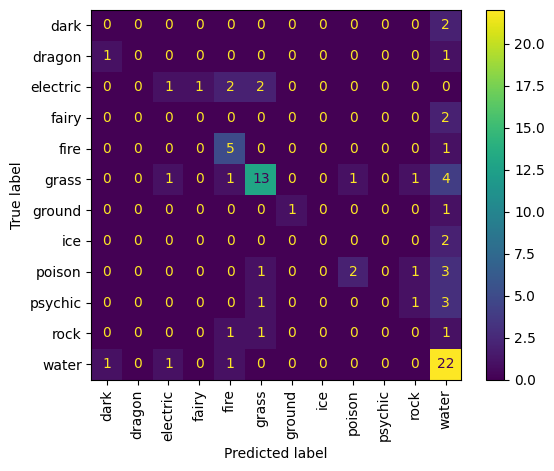

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_.tolist())
disp.plot(xticks_rotation='vertical');

In [ ]:
X_train_pred = neigh.predict(X_train)

In [ ]:
round(accuracy_score(y_train, X_train_pred) * 100, 2) # Porcentagem treino

42.55

In [ ]:
round(accuracy_score(y_test, y_pred) * 100, 2) # Porcentagem teste

53.01

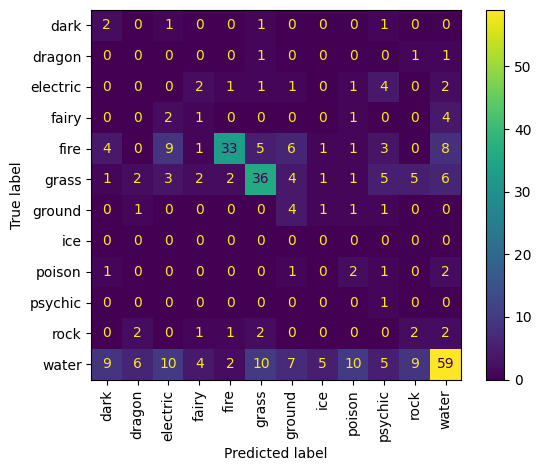

In [ ]:
cm = confusion_matrix(X_train_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_.tolist())
disp.plot(xticks_rotation='vertical');

In [ ]:
np.unique(y_test).shape

(12,)

#### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
scale = Normalizer()

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# x_train_norm = scale.fit_transform(X_train)
# x_val_norm = scale.fit_transform(X_val)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
scale = Normalizer()
X_train_norm = scale.fit_transform(X_train)
X_test_norm = scale.fit_transform(X_test)

In [ ]:
modelo = MLPClassifier(
            hidden_layer_sizes = (50,), activation = 'logistic',
            learning_rate_init = 0.001, max_iter = 1000)
modelo.fit(X_train_norm, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=1000)

##### Melhores parâmetros

In [ ]:
# h_neuronios = [10, 50, 100]
# f_activations = ['relu', 'logistic']
# learning_rate_init_values = [0.1, 0.001, 0.0001]
# qtd_epochs = [10, 100, 1000]


# melhor_parametros = ""
# best_model = None
# best_mean_acc = 0

# for h in h_neuronios:
#   for f in f_activations:
#     for r in learning_rate_init_values:
#       for e in qtd_epochs:

#         modelo = MLPClassifier(
#             hidden_layer_sizes = (h,), activation = f,
#             learning_rate_init = r, max_iter = e )

#         sum_acc = 0
#         for i in range(5):

#           modelo.fit(x_train_norm, y_train)
#           prev = modelo.predict(x_val_norm)
#           acc = accuracy_score(y_val, prev) * 100

#           sum_acc += acc

#         mean_acc = sum_acc/5
#         if mean_acc > best_mean_acc:
#           best_mean_acc = mean_acc
#           best_model = modelo
#           melhor_parametros = f"h:{h}-f:{f}-r:{r}-e:{e} --- ACC: {acc}"

In [ ]:
# melhor_parametros

##### Previsão e métrica

In [ ]:
X_train_prev = modelo.predict(X_train)

In [ ]:
round(accuracy_score(y_train, X_train_prev) * 100, 2) # Porcentagem do treino

41.14

In [ ]:
prev = modelo.predict(X_test)

In [ ]:
round(accuracy_score(y_test, prev) * 100, 2) # Porcentagem do teste

41.94

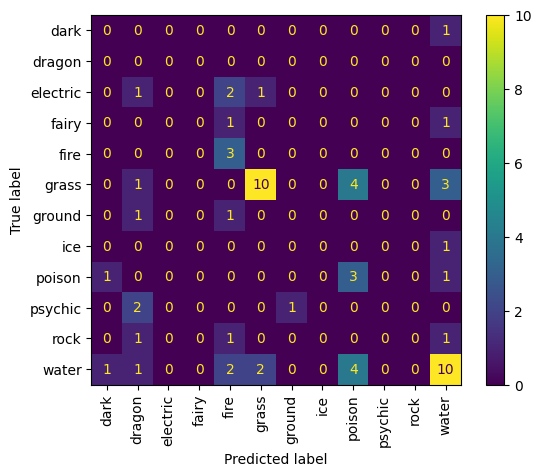

In [ ]:
cm = confusion_matrix(y_test, prev)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_.tolist())
disp.plot(xticks_rotation='vertical');

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

##### Melhores parâmetros

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# criterios = ["gini", "entropy", "log_loss"]
# max_depth = [2, 4, 8, 10]
# best_params = {"criterio" : "entropy", "max_depth": 0}
# best_acc = 0


# for c in criterios:
#   for m in max_depth:

#     modelo = DecisionTreeClassifier(
#         criterion=c,
#         max_depth=m,
#         random_state = 42
#         )

#     modelo.fit(X_train, y_train)
#     prev = modelo.predict(X_val)
#     acc = accuracy_score(y_val, prev) * 100
#     if acc > best_acc:
#       print(best_acc)
#       best_acc = acc
#       best_params['criterio'] = c
#       best_params['max_depth'] = m

In [ ]:
# best_params

##### Treino

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        random_state = 42
        )

In [ ]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

##### Previsão e métrica

In [ ]:
X_train_prev2 = modelo.predict(X_train)

In [ ]:
round(accuracy_score(y_train, X_train_prev2) * 100, 2) # Porcentagem do treino

99.7

In [ ]:
prev = modelo.predict(X_test)

In [ ]:
round(accuracy_score(y_test, prev) * 100, 2) # Porcentagem do teste

44.58

In [ ]:
# import graphviz
# from sklearn.tree import plot_tree
# from sklearn import tree
# dot_data = tree.export_graphviz(modelo, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render("Pokemon")

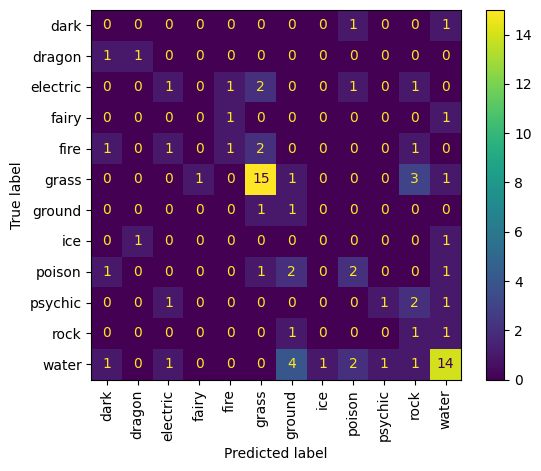

In [ ]:
cm = confusion_matrix(y_test, prev)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_.tolist())
disp.plot(xticks_rotation='vertical');